In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#sort in descending order and pick first; in string fomat so still filters chronologically
most_recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


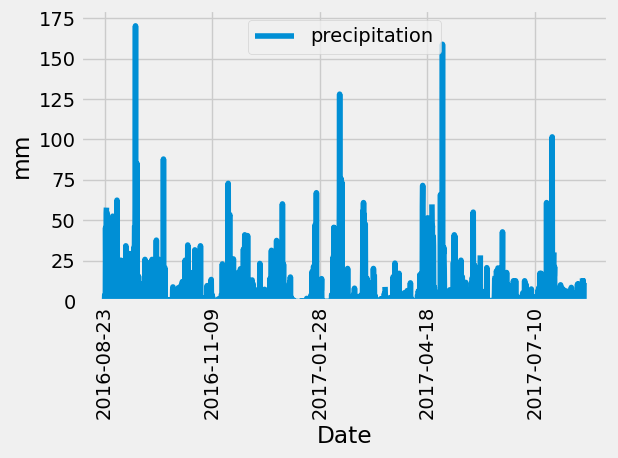

            precipitation
date                     
2016-08-23            0.0
2016-08-23            3.8
2016-08-23            1.3
2016-08-23            NaN
2016-08-23            0.5
...                   ...
2017-08-22           12.7
2017-08-23            0.0
2017-08-23            0.0
2017-08-23            2.0
2017-08-23           11.4

[2230 rows x 1 columns]


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()

# Calculate the date one year from the last date in data set.
#done in this code: "values = session.query(Measurement.date, Measurement.prcp).\
   # filter(Measurement.date >= '2016-08-22').\
    #order_by(Measurement.date).all()"
#already done as i filtered the value greater then 2016-08-22 as we include all days.

# Perform a query to retrieve the data and precipitation scores
#already been done in "values = session.query(Measurement.date, Measurement.prcp).\
    #filter(Measurement.date >= '2016-08-22').\
    #order_by(Measurement.date).all()"
#as "values = session.query(Measurement.date, Measurement.prcp).\",this line selects the
#date" and "prcp" columns from the "Measurement" table.

# Save the query results as a Pandas DataFrame. Explicitly set the column names
values_df = pd.DataFrame(values, columns=["date","precipitation"])
values_final_df = values_df.set_index("date")

# Sort the dataframe by date
#already done is 'values = session.query(Measurement.date, Measurement.prcp).\
    #filter(Measurement.date >= '2016-08-22').\
    #order_by(Measurement.date).all()'
# "order_by(Measurement.date).all()", specifices i am wanting the "date"
#  column in ascdending order.
# Use Pandas Plotting with Matplotlib to plot the data

# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0, 180)
plt.yticks([0, 25,50, 75, 100, 125, 150, 175])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('mm')
plt.tight_layout()
plt.show()

print(values_final_df)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
values_final_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
## Design a query to calculate the total number of stations in the dataset
total_number = session.query(Station.station).count()
total_number

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()

# Print the most active stations and their counts
print("active_stations:")
print("[")
for station, count in active_stations:
     print(f"( {station}, {count}), ")

active_stations:
[
( USC00519281, 2772), 
( USC00519397, 2724), 
( USC00513117, 2709), 
( USC00519523, 2669), 
( USC00516128, 2612), 
( USC00514830, 2202), 
( USC00511918, 1979), 
( USC00517948, 1372), 
( USC00518838, 511), 


In [14]:
# Get the list of active stations and their counts
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()

# Create an empty list to store formatted station info
formatted_stations = []

# Iterate through each station and count tuple and format them
for station, count in active_stations:
    formatted_station = "('{}', {})".format(station, count)
    formatted_stations.append(formatted_station)

# Combine the formatted station info using a comma and space
result = "[" + ",\n".join(formatted_stations) + "]"

# Print the result
print(result)



[('USC00519281', 2772),
('USC00519397', 2724),
('USC00513117', 2709),
('USC00519523', 2669),
('USC00516128', 2612),
('USC00514830', 2202),
('USC00511918', 1979),
('USC00517948', 1372),
('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Most active station would be the first in a descending list of measurement station count - Station: USC00519281

most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()

# Check to see if most active station was selected:
# print(most_active_station) 

# Isolate station number from this list of station numbers and count of stations
most_active_station_number = most_active_station[0]
most_active_station_number 

# Lowest, highest, and average temperatures for the most active station
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station==most_active_station_number).all()
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station==most_active_station_number).all()
average_temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station_number).all()

# Print the results in one line
print(f"[({lowest_temperature[0][0]}, {highest_temperature[0][0]}, {average_temperature[0][0]})]")



[(12.2, 29.4, 22.03582251082252)]


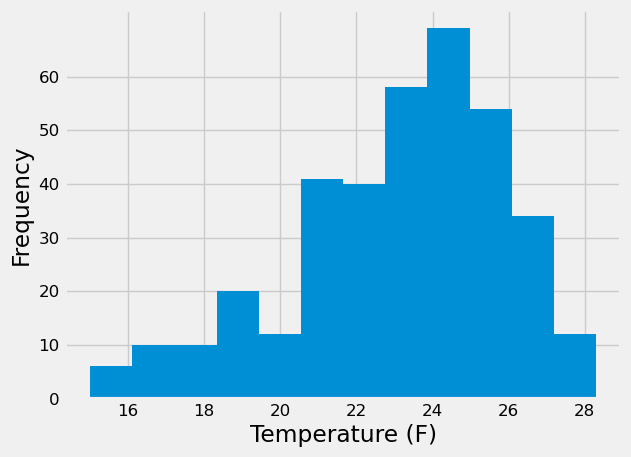

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()

# Create query saying to find dates 12 months before 2017-08-08 (thus > 2016-08-08), for our most active station
twelve_month_values = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-08').all()  

# Create series with just tobs from this 12 month period 
twelve_month_tobs_values_df = pd.DataFrame(twelve_month_values, columns=["date", "tobs"])["tobs"]
pd.DataFrame(twelve_month_tobs_values_df)


# Plot histogram
plt.hist(twelve_month_tobs_values_df, bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks([0,10,20,30,40,50,60])
plt.show()


In [17]:
twelve_month_tobs_values_df = pd.DataFrame(twelve_month_values, columns=["0", "tobs"])["tobs"]
pd.DataFrame(twelve_month_tobs_values_df)

,tobs
0,27.2
1,27.8
2,26.7
3,24.4
4,26.7
...,...
361,25.0
362,25.0
363,24.4
364,24.4


# Close Session

In [18]:
# Close Session
session.close()